<h1>SQL</h1>

1.	Найдите наибольший платеж по кредитной карте в разрезе ВСП. Формат вывода: ВСП, максимальный платёж.

In [ ]:
SELECT
  vsp_id AS ВСП,
  MAX(payment) AS Максимальный_платеж
FROM CreditCardinf
GROUP BY vsp_id;

2.	Вывести следующую информацию по всем кредитным картам: ФИО, номер карты, кредитный лимит для тех записей, где будет совпадать номер договора WAY4.

In [ ]:
SELECT
  fio AS ФИО,
  card_number AS Номер_карты,
  credit_limit AS Кредитный_лимит
FROM CreditCardinf
WHERE way4_contract_number = 'WAY4';

3.	Вывести все кредитные карты того ВСП, в котором обслуживается клиент с паспортными данными «12 34 567890».

In [ ]:
SELECT
  card_number AS Номер_карты
FROM CreditCardinf
WHERE passport_data = '12 34 567890'
GROUP BY vsp_id;

4.	Необходимо разработать код хранимой процедуры\функции, которая при передаче в нее текущей отчетной даты будет возвращать в табличном режиме значения текущей даты и дат предыдущих 3 недель.

In [ ]:
@MS-SQL
GO
CREATE PROCEDURE get_previous_weeks_dates(
  @report_date DATE
)
AS
BEGIN
  DECLARE @current_week_start_date DATE;
  DECLARE @previous_week_start_date DATE;
  DECLARE @two_weeks_ago_start_date DATE;
  DECLARE @three_weeks_ago_start_date DATE;

  -- Определить дату начала текущей недели
  SET @current_week_start_date = DATEADD(DAY, -1 - DATEPART(dw, @report_date), @report_date);

  -- Определить дату начала предыдущей недели
  SET @previous_week_start_date = DATEADD(DAY, -7, @current_week_start_date);

  -- Определить дату начала двух недель назад
  SET @two_weeks_ago_start_date = DATEADD(DAY, -7, @previous_week_start_date);

  -- Определить дату начала трех недель назад
  SET @three_weeks_ago_start_date = DATEADD(DAY, -7, @two_weeks_ago_start_date);

  -- Вывести даты в табличном формате
  SELECT
    @current_week_start_date
  UNION
  SELECT
    @previous_week_start_date
  UNION
  SELECT
    @two_weeks_ago_start_date
  UNION
  SELECT
    @three_weeks_ago_start_date
END;
GO
EXEC get_previous_weeks_dates @report_date = '2013-03-06'

<h1>DS & DE</h1>

5.	Чем логистическая регрессия отличается от линейной?

<h3>Выходные значения и применение</h3>
Линейная регрессия: Используется для предсказания непрерывных значений.<br>
Логистическая регрессия: Используется для задач классификации, где необходимо предсказать категориальную переменную (число от 0 до 1)

<h3>Распределение</h3>
Линейная регрессия: подчиняется нормальную распределению.<br>
Логистическая регрессия: следует биномиальному распределению

<h3>Линия регрессии</h3>
Линейная регрессия: прямая.<br>
Логистическая регрессия: сигмоида

6.	Чем градиентный спуск отличается от стохастического градиентного спуска?

Проблема обычного градиентного спуска заключается в том, что чтобы сделать один шаг градиентного спуска и изменить вектор весов необходимо вычислить градиент от каждого элемента выборки. <br>
Стохастический градиентный спуск отличается от градиентного спуска тем, что для обновления весов модели используется только один случайно выбранный сэмпл из обучающей выборки.

7.	Какие компоненты входят в тройное экспоненциальное сглаживание временного ряда?

Экспоненциальное сглаживание - метод прогнозирования временных рядов.<br>
Тройное экспоненциальное сглаживание учитывает:

*   Уровень (L): Представляет собой базовое значение временного ряда в данный момент времени.
*   Тренд (T): Отражает направление и скорость изменения уровня со временем.
*   Сезонность (S): Учитывает повторяющиеся колебания уровня в течение определенного периода, например, сезонные колебания продаж.

8.	Известные Вам метрики качества для классификации и регрессии?

<h3>Классификация:</h3>
Метрики, получаемые с помощью значений матрицы ошибок
Accuracy (Точность)<br>
Precision (Точность предсказаний положительных объектов)<br>
Recall (Плотность)<br>
F1-мера (Precision-Recall)<br>
ROC-AUC (площадь под ROC-кривой)<br>
<h3>Регрессия:</h3>
MSE (Mean Squared Error)<br>
RMSE (Root Mean Squared Error)<br>
MAE (Mean absolute error)<br>
MAPE (Mean absolute percentage error)<br>
R^2 (Объясненная дисперсия)<br>

9.	Для чего нужна регуляризация?

Для борьбы с переобучением. Модель становится склонна к переобучению, когда у неё излишне много параметров, и при работе модели с данными из тестовой выборки, которые она ранее во время обучения не видела, наблюдаются частые ошибки.<br>
Один из вариантов реализации регуляризации - Dropout. Он случайным образом "отключает" нейроны в сети во время обучения, предотвращая их совместную адаптацию к тренировочным данным.



In [1]:
# иморитирование всех необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Считываем данные
df = pd.read_excel("dataset_taxi.xlsx")

print(f"Train dataset shape: {df.shape}")

Train dataset shape: (100000, 14)


In [3]:
# Посмотрим как выглядят данные
df.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


Параметры:<br>
offer_gk - глобальный идентификатор заказа<br>
weekday_key - день недели заказа числом<br>
hour_key - час заказа<br>
driver_gk - глобальный идентификатор водителя<br>
order_gk - глобальный идентификатор поездки<br>
driver_latitude - широта местоположения водителя<br>
driver_longitude - долгота местоположения водителя<br>
origin_order_latitude - широта точки заказа<br>
origin_order_longitude - долгота точки заказа<br>
distance_km - расстояние в километрах<br>
duration_min - время в пути в минутах<br>
offer_class_group - класс поездки<br>
ride_type_desc - класс заказчика<br>
driver_response - решение водителя (принял или отклонил заказ)

In [4]:
df.isna().sum()

offer_gk                  0
weekday_key               0
hour_key                  0
driver_gk                 0
order_gk                  0
driver_latitude           0
driver_longitude          0
origin_order_latitude     0
origin_order_longitude    0
distance_km               0
duration_min              0
offer_class_group         0
ride_type_desc            0
driver_response           0
dtype: int64

Пропусков в таблице нет

In [6]:
dff = df.loc[:, ['distance_km', "duration_min"]]

In [7]:
crr = dff.corr()

<Axes: >

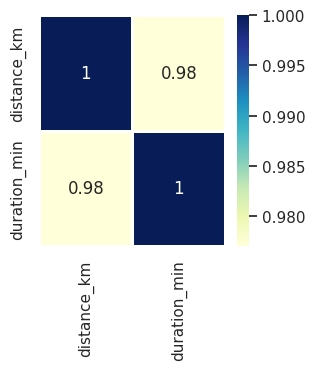

In [11]:
sns.set(rc = {'figure.figsize':(3,3)})

sns.heatmap(crr, annot = True, cmap="YlGnBu", linecolor='white',linewidths=1)

Значения distance_km и duration_min сильно коррелируют.

In [14]:
print(dff[(dff['distance_km'] == -1) & (dff['duration_min'] == -1)].shape)
print(dff[dff['distance_km'] == -1].shape)

(26207, 2)
(26207, 2)


Одно из значений distance_km и duration_min равно -1 тогда и только тогда, когда -1 равно и второе значение<br>
Вероятно, такая запись относится к заказу с несостоявшейся поездкой

Можно избавиться от полей с идентификаторами поездки и заказа, так как они уникальны в каждой записи и не несут информации, которая могла бы влиять на значение зависимой переменной

Можно объединить широту и долготу в одну переменную координат положения.<br>
Или вовсе избавиться от координат, добавив столбец со значением расстояния от местоположения водителя до точки заказа.

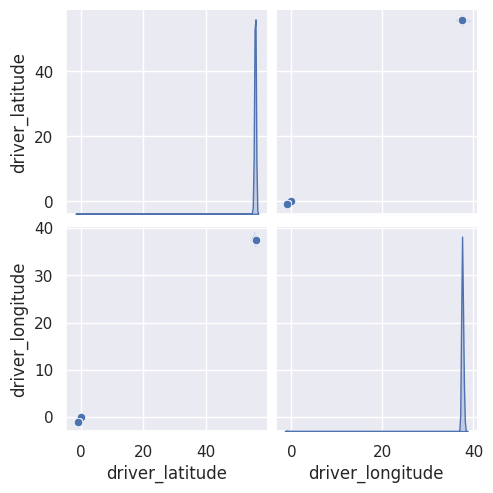

In [22]:
sns.set()
columns = ['driver_latitude', 'driver_longitude']

sns.pairplot(df[columns], kind ='scatter', diag_kind='kde')
plt.show()

<ipython-input-24-ac3911da4484>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='driver_response', data=y_data, palette='hls')


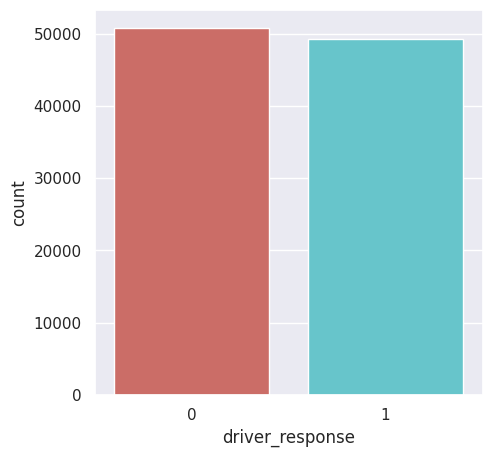

In [24]:
sns.set(rc = {'figure.figsize':(5,5)})
y_data = pd.DataFrame(df['driver_response'])
sns.countplot(x='driver_response', data=y_data, palette='hls')
plt.show()

Классы сбалансированы. Дополнять данные или отсекать не требуется.

In [25]:
df.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


In [26]:
import numpy as np

In [27]:
!pip install haversine

In [30]:
from haversine import haversine

In [44]:
df['init_distance'] = df.apply(lambda x: haversine((x['driver_latitude'], x['driver_longitude']), (x['origin_order_latitude'], x['origin_order_longitude'])), axis=1)

In [46]:
df['init_distance']

0        1.363047
1        3.413097
2        0.410000
3        0.647473
4        1.062483
           ...   
99995    0.621864
99996    0.405427
99997    0.204433
99998    0.393915
99999    0.433240
Name: init_distance, Length: 100000, dtype: float64

In [47]:
df = df.drop(columns=['driver_latitude', 'driver_longitude', 'origin_order_latitude', 'origin_order_longitude'])

In [49]:
df = df.drop(columns=['offer_gk', 'order_gk'])

In [53]:
df['ride_type_desc'].unique()

array(['private', 'business', 'affiliate', 'SMB'], dtype=object)

In [54]:
df['offer_class_group'].unique()

array(['Economy', 'Standard', 'XL', 'Kids', 'Delivery', 'Test', 'Premium',
       'VIP', 'VIP+'], dtype=object)

In [55]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['ride_type_desc'] = le.fit_transform(df['ride_type_desc'])
df['offer_class_group'] = le.fit_transform(df['offer_class_group'])

Перед обучением приведём категориальные признаки к числовому виду с помощью LabelEncoder.

Как было замечено ранее, запись со значениями полей distance_km и	duration_min, вероятно, относится к заказу с несостоявшейся поездкой.

Такая запись в виде отрицательного числа может внести неясность при анализе.<br> К тому же, эти значения характеризуют поездку, но не влияют на решение водителя принимать заказ или нет (предполагается, что водитель не знает расположение точки B маршрута перед решением)

In [57]:
df = df.drop(columns=['distance_km', 'duration_min'])

In [58]:
df.head()

,weekday_key,hour_key,driver_gk,offer_class_group,ride_type_desc,driver_response,init_distance
0,5,20,6080,1,3,0,1.363047
1,5,14,6080,4,3,1,3.413097
2,6,14,6080,1,3,0,0.410000
3,2,6,6080,1,3,1,0.647473
4,4,16,6080,1,3,1,1.062483


Разделим выборку на тренировочную и тестовую

In [59]:
X = df.drop(columns=['driver_response'])
y = df['driver_response']

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (70000, 6), (70000,)
Train dataset size: (30000, 6), (30000,)


In [86]:
from sklearn.tree import DecisionTreeClassifier

# Модель дерева решений
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

answers_pred = model.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_test, answers_pred)}')

Accuracy: 0.7507


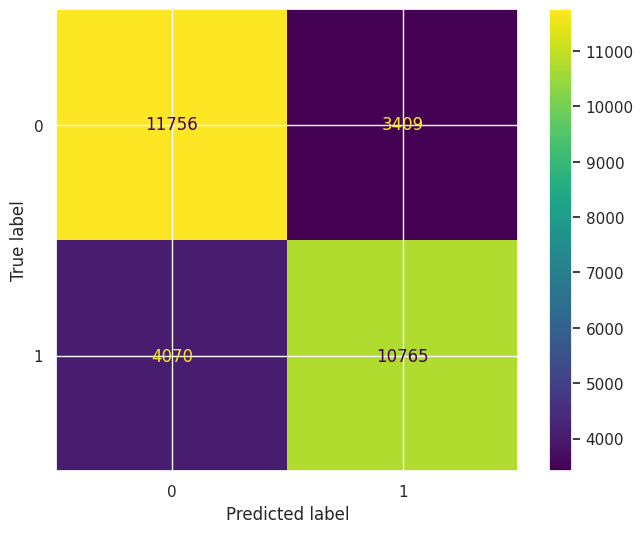

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, answers_pred)

fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)

display.plot(ax=ax)

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test, answers_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76     15165
           1       0.76      0.73      0.74     14835

    accuracy                           0.75     30000
   macro avg       0.75      0.75      0.75     30000
weighted avg       0.75      0.75      0.75     30000



In [96]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [97]:
answers_pred_log = logreg.predict(X_test)

In [98]:
print(f'Accuracy: {accuracy_score(y_test, answers_pred_log)}')

Accuracy: 0.5478333333333333


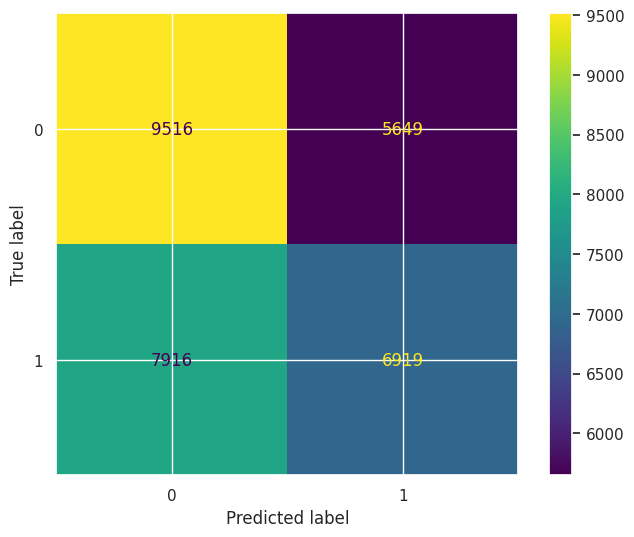

In [102]:
conf_matrix = confusion_matrix(y_test, answers_pred_log)

fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(conf_matrix, display_labels=logreg.classes_)

display.plot(ax=ax)

In [99]:
print(classification_report(y_test, answers_pred_log))

              precision    recall  f1-score   support

           0       0.55      0.63      0.58     15165
           1       0.55      0.47      0.50     14835

    accuracy                           0.55     30000
   macro avg       0.55      0.55      0.54     30000
weighted avg       0.55      0.55      0.54     30000



Наилучшим образом себя показала модель дерева решений